In [33]:
import os
import pandas as pd
import json
from datasets import load_dataset

In [34]:
from datasets import load_dataset

ds = load_dataset("DigitalLearningGmbH/MATH-lighteval", "default")

In [2]:
MODEL_ALIAS = "Qwen-Qwen2.5-7B-Instruct"

In [3]:
MATH_TEST_PATH = f"MATH/test-{MODEL_ALIAS}_maxlen_3000_k_50_temp_1.0.parquet"
SAMPLE_MATH_TEST_PATH = f"THOM_MATH/MATH_train_1000-{MODEL_ALIAS}-temperature=1.0.parquet"

In [ ]:
original_train_topics = ds["train"]["type"]
original_test_topics = ds["test"]["type"]

In [61]:
pd.DataFrame(original_train_topics)[:1000].value_counts()

0      
Algebra    1000
Name: count, dtype: int64

In [38]:
full_math_df = pd.read_parquet(MATH_TEST_PATH)
thom_math_df = pd.read_parquet(SAMPLE_MATH_TEST_PATH)

In [42]:
full_math_df["topics"] = original_test_topics
thom_math_df["topics"] = original_test_topics[:len(thom_math_df)]

In [43]:
matched_full_math_df = full_math_df[:len(thom_math_df)]

In [44]:
thom_math_df

,generated_solutions,ground_truth,success_rate,formatted_prompt,problem,prompt,topics
0,"[{'score': 1.0, 'text': 'To determine the valu...",0,1.00,"<|im_start|>system\nYou are Qwen, created by A...","Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...","Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...",Algebra
1,"[{'score': 1.0, 'text': 'To solve this problem...",98,0.86,"<|im_start|>system\nYou are Qwen, created by A...",A rectangular band formation is a formation wi...,A rectangular band formation is a formation wi...,Algebra
2,"[{'score': 1.0, 'text': 'To find the degree of...",4,1.00,"<|im_start|>system\nYou are Qwen, created by A...",What is the degree of the polynomial $(4 +5x^3...,What is the degree of the polynomial $(4 +5x^3...,Algebra
3,"[{'score': 1.0, 'text': 'Let's evaluate the ex...",17,1.00,"<|im_start|>system\nYou are Qwen, created by A...",Evaluate $\left\lceil3\left(6-\frac12\right)\r...,Evaluate $\left\lceil3\left(6-\frac12\right)\r...,Algebra
4,"[{'score': 1.0, 'text': 'Let's define the vari...",6,1.00,"<|im_start|>system\nYou are Qwen, created by A...",Sam is hired for a 20-day period. On days that...,Sam is hired for a 20-day period. On days that...,Algebra
...,...,...,...,...,...,...,...
995,"[{'score': 0.0, 'text': 'To determine the valu...",\frac{-7}{23},0.04,"<|im_start|>system\nYou are Qwen, created by A...","The three points $(3,-5)$, $(-a + 2, 3)$, and ...","The three points $(3,-5)$, $(-a + 2, 3)$, and ...",Algebra
996,"[{'score': 1.0, 'text': 'To determine the valu...",10,1.00,"<|im_start|>system\nYou are Qwen, created by A...","On Monday, I worked $t-6$ hours and earned $2t...","On Monday, I worked $t-6$ hours and earned $2t...",Algebra
997,"[{'score': 0.0, 'text': 'To solve the equation...",-\dfrac{10}{9},0.24,"<|im_start|>system\nYou are Qwen, created by A...",Solve for the largest value of $x$ such that $...,Solve for the largest value of $x$ such that $...,Algebra
998,"[{'score': 1.0, 'text': 'To find the value of ...",459,1.00,"<|im_start|>system\nYou are Qwen, created by A...","If $x+y=9$ and $xy=10$, what is the value of $...","If $x+y=9$ and $xy=10$, what is the value of $...",Algebra


In [45]:
# Compare full MATH vs THOM_MATH distributions
import numpy as np

print("="*60)
print("FULL MATH DATASET (k=50)")
print("="*60)
print(f"Total samples: {len(full_math_df)}")
print(f"Success rate - Mean: {full_math_df['success_rate'].mean():.4f}, Std: {full_math_df['success_rate'].std():.4f}")
print(f"Success rate - Min: {full_math_df['success_rate'].min():.4f}, Max: {full_math_df['success_rate'].max():.4f}")
print(f"Success rate - Median: {full_math_df['success_rate'].median():.4f}")

# Bin distribution
bins = pd.cut(full_math_df['success_rate'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['B0 (Hard)', 'B1', 'B2', 'B3', 'B4 (Easy)'])
print(f"\nBin distribution:")
print(bins.value_counts().sort_index())
print(f"Bin percentages:")
print((bins.value_counts(normalize=True).sort_index() * 100).round(1))

print("\n" + "="*60)
print("THOM_MATH DATASET (k=1000, sequential sampling)")
print("="*60)
print(f"Total samples: {len(thom_math_df)}")
print(f"Success rate - Mean: {thom_math_df['success_rate'].mean():.4f}, Std: {thom_math_df['success_rate'].std():.4f}")
print(f"Success rate - Min: {thom_math_df['success_rate'].min():.4f}, Max: {thom_math_df['success_rate'].max():.4f}")
print(f"Success rate - Median: {thom_math_df['success_rate'].median():.4f}")

# Bin distribution
bins_sample = pd.cut(thom_math_df['success_rate'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['B0 (Hard)', 'B1', 'B2', 'B3', 'B4 (Easy)'])
print(f"\nBin distribution:")
print(bins_sample.value_counts().sort_index())
print(f"Bin percentages:")
print((bins_sample.value_counts(normalize=True).sort_index() * 100).round(1))

print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)
print(f"THOM_MATH has {(thom_math_df['success_rate'] > 0.8).sum()} problems ({(thom_math_df['success_rate'] > 0.8).sum()/len(thom_math_df)*100:.1f}%) with SR > 0.8")
print(f"MATH has {(full_math_df['success_rate'] > 0.8).sum()} problems ({(full_math_df['success_rate'] > 0.8).sum()/len(full_math_df)*100:.1f}%) with SR > 0.8")
print(f"\nTHOM_MATH std/mean ratio: {thom_math_df['success_rate'].std() / thom_math_df['success_rate'].mean():.4f}")
print(f"MATH std/mean ratio: {full_math_df['success_rate'].std() / full_math_df['success_rate'].mean():.4f}")

FULL MATH DATASET (k=50)
Total samples: 5000
Success rate - Mean: 0.6973, Std: 0.3732
Success rate - Min: 0.0000, Max: 1.0000
Success rate - Median: 0.9200

Bin distribution:
success_rate
B0 (Hard)     556
B1            339
B2            329
B3            445
B4 (Easy)    2930
Name: count, dtype: int64
Bin percentages:
success_rate
B0 (Hard)    12.1
B1            7.4
B2            7.2
B3            9.7
B4 (Easy)    63.7
Name: proportion, dtype: float64

THOM_MATH DATASET (k=1000, sequential sampling)
Total samples: 1000
Success rate - Mean: 0.9089, Std: 0.2260
Success rate - Min: 0.0000, Max: 1.0000
Success rate - Median: 1.0000

Bin distribution:
success_rate
B0 (Hard)     29
B1            17
B2            20
B3            40
B4 (Easy)    876
Name: count, dtype: int64
Bin percentages:
success_rate
B0 (Hard)     3.0
B1            1.7
B2            2.0
B3            4.1
B4 (Easy)    89.2
Name: proportion, dtype: float64

KEY INSIGHTS
THOM_MATH has 876 problems (87.6%) with SR > 0.8
MATH

<Axes: >

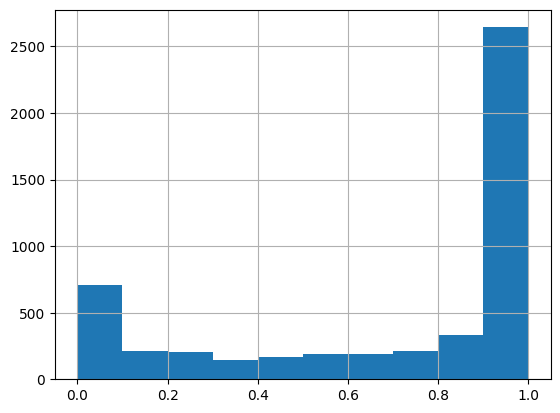

In [46]:
full_math_df["success_rate"].hist()

<Axes: >

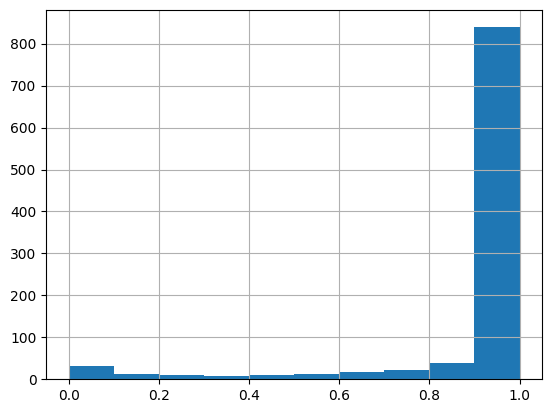

In [47]:
thom_math_df["success_rate"].hist()

In [48]:
thom_math_df["success_rate"].mean()

0.9088600000000001

In [49]:
full_math_df["success_rate"].mean()

0.6973159999999999

In [50]:
full_math_df["success_rate"][:1000].mean()

0.88744

In [51]:
equiv_random_sample_df = full_math_df.sample(n=1000, random_state=42)

In [52]:
equiv_random_sample_df["success_rate"].mean()

0.69004

In [58]:
thom_math_df.groupby("topics")["success_rate"].mean()

topics
Algebra    0.90886
Name: success_rate, dtype: float64

In [59]:
full_math_df.groupby("topics")["success_rate"].mean()

topics
Algebra                   0.886824
Counting & Probability    0.650253
Geometry                  0.572025
Intermediate Algebra      0.512137
Number Theory             0.714074
Prealgebra                0.822204
Precalculus               0.526557
Name: success_rate, dtype: float64